<a href="https://colab.research.google.com/github/ZoubirCHATTI/08_Machin_Learning/blob/main/02_IMDB_review_classification/IMDB_Classification_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
#Loading data
(train_data, train_labels), (temp_data, temp_labels)=imdb.load_data(num_words=10000)

[12500 12500]


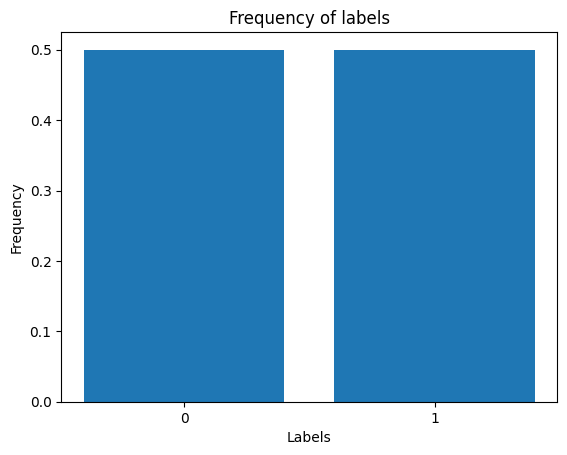

In [24]:
#Visual inspection of data(Verification data equilibrium )
counts=np.bincount(train_labels)
print(counts)
plt.figure()
plt.bar(range(len(counts)), counts/np.sum(counts))
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Frequency of labels')
plt.xticks(np.arange(len(counts)))
plt.show()

In [25]:
#Extracting words indices (given the word, we get the index)
word_index=imdb.get_word_index()
#Getting word from the index (given the index, we get the word associated)
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])

print(f"the index of the word amazing is :{word_index['amazing']}")
print(f"\nThe word that has 5 as index is: {reverse_word_index[5]}")


the index of the word amazing is :477

The word that has 5 as index is: to


In [26]:
#A function that decodes every index in the data to get the review
def decode_review(index, sequence):
  return " ".join(reverse_word_index.get(i-3, "?") for i in sequence[index])

In [27]:
#Testing decode function
review_0=decode_review(0, train_data)
review_1=decode_review(1, train_data)
print(f"the first review in the train dataset i {review_0}")
print(f"\nThe second review in the train dataset is {review_1}")

the first review in the train dataset i ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be prais

In [28]:
#Transforming data (input) to a binary matrix
def vectorize_sequence(sequence, dimension):
  results=np.zeros((len(sequence), dimension))
  for i, seq in enumerate(sequence):
    for j in seq:
      results[i , j]=1
  return results

In [29]:
#Vectorizing inputs
X_train=vectorize_sequence(train_data, dimension=10000)
X_temp=vectorize_sequence(temp_data, dimension=10000)

In [30]:
#Defining test and validation datasets
X_test, X_val, Y_test, Y_val=train_test_split(X_temp, temp_labels, test_size=0.5)

In [31]:
#Mounting DNN model
model=Sequential()
model.add(Dense(32, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Stop condition
early_stopping=EarlyStopping(monitor='val_loss', patience=2)

In [33]:
#Running the training
history=model.fit(X_train, train_labels, epochs=10, callbacks=[early_stopping], batch_size=512, validation_data=(X_val, Y_val))

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.7436 - loss: 0.5416 - val_accuracy: 0.8844 - val_loss: 0.2927
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9224 - loss: 0.2193 - val_accuracy: 0.8855 - val_loss: 0.2885
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9498 - loss: 0.1483 - val_accuracy: 0.8795 - val_loss: 0.3124
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9621 - loss: 0.1182 - val_accuracy: 0.8715 - val_loss: 0.3507


In [44]:
#Evaluation of the performance of the model
loss, accuracy=model.evaluate(X_test, Y_test)

391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8704 - loss: 0.3516


In [35]:
#Unpacking different evaluation parameters
histroy_dict=history.history
train_loss=histroy_dict['loss']
val_loss=histroy_dict['val_loss']
train_acc=histroy_dict['accuracy']
val_acc=histroy_dict['val_accuracy']

epochs=range(1, len(train_loss)+1)

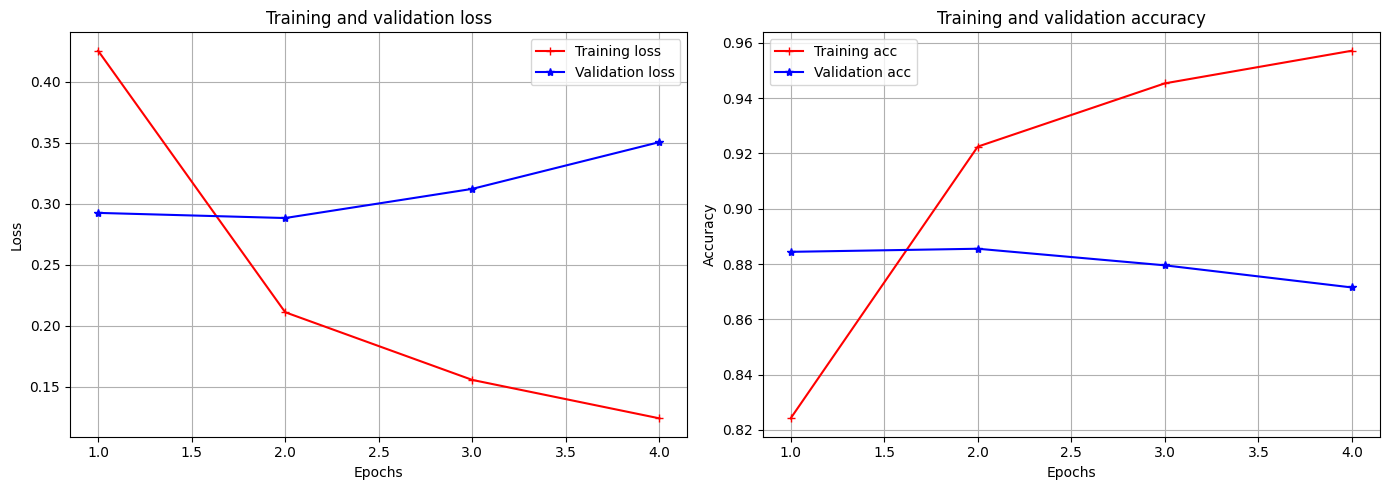

In [36]:
#Plotting loss and accuracy against epochs
plt.figure(figsize=(14, 5))
plt.subplot(1 , 2 , 1)
plt.plot(epochs, train_loss, color='r',marker='+', label='Training loss')
plt.plot(epochs, val_loss, color='b', marker='*', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.subplot(1 , 2 , 2)
plt.plot(epochs, train_acc, color='r', marker='+', label='Training acc')
plt.plot(epochs, val_acc, color='b', marker='*', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
#Comparing with the baseline
import copy
Y_test_label_copy=copy.deepcopy(Y_test)
np.random.shuffle(Y_test_label_copy)
compare=np.array(Y_test_label_copy)== Y_test
print(f"Random accuracy={compare.mean()*100:.2f}%\nModel accuracy={accuracy*100:.2f}% ")

Random accuracy=49.94%
Model accuracy=87.14% 
